# GSEApy and Enrichr API

**API**: GSEApy and Enrichr API

**Description:** GSEApy is a suite of tools implemented in Python/Rust to conduct gene set enrichment analysis (GSEA). A subset of gene set enrichment analysis is overrepresentation analysis, which computes the significance of overlap between an input gene set and a set of related genes or enrichment terms called gene set libraries. These gene set libraries have enrichment terms that are typically biologically meaningful to give interpretability and significance to a list of genes. GSEApy is a wrapper and an API for Enrichr, a website conducting overrepresentation analysis for many well-known gene set libraries such as the Gene Ontology (GO), Kegg, Reactome, and HDSigDB. Other tools implemented in GSEApy generate publication-worthy figures from results derived from the Enrichr API. Visit the [Enrichr website](https://https://maayanlab.cloud/Enrichr/) or read [GSEApy's documentation](https://https://gseapy.readthedocs.io/en/latest/introduction.html) here.

**Tutorial**:

https://colab.research.google.com/drive/1YLipihIH9RxP6ATSQwcFvPeWD6qBV_Vj?usp=sharing

**Use cases:**
*   Identify important biological processes underlying a set of differentially expressed genes derived from statistical testing of transcriptomic data (e.g. scRNA-seq or bulk RNA-seq) between two conditions (e.g. control vs. experimental) or between clusters (scRNA-seq specific).
*   Generate figures such as dot plots and bar charts, visualizing the top enrichment terms for a gene set library.



Install GSEApy and import relevant packages:

In [ ]:
%pip install gseapy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 548.5/548.5 kB 8.3 MB/s eta 0:00:00


In [ ]:
import gseapy as gp
import pandas as pd

## Identify important biological processes underlying a set of differentially expressed genes

Import differentially expressed genes (DEGs) and a list of background genes. DEGs can be derived from statistical packages such as DESeq2 (Or the Python implementation PyDESeq2), Limma, MAST, etc. :

*  Note: For transcriptomic analysis, the background gene list is typically the list of remaining genes after relevant quality control metrics, differentially expressed or not.

For this example, DEGs were calculated in a scRNA-seq dataset using PyDESeq2 for experimental versus control conditions in each cell type. The background gene list is the remaining genes post quality control metrics from our adata object in Scanpy.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path_to_drive = "/content/drive/MyDrive/BIOINFO 201/Project_F24/"
degs_df = pd.read_csv(path_to_drive + "DEGS.csv", index_col = 0)
background_genes_df = pd.read_csv(path_to_drive + "Background_Genes.csv", index_col = 0)
degs_df, background_genes_df

(                         cell_type       baseMean  log2FoldChange     lfcSE  \
 index                                                                         
 Htra1          Smooth_Muscle_Cells   32258.565744        0.841227  0.014665   
 Gpx1           Smooth_Muscle_Cells   25760.569182        0.717626  0.013720   
 Fth1           Smooth_Muscle_Cells  380385.521288        0.337565  0.007481   
 Anxa1          Smooth_Muscle_Cells   20592.252390        0.650013  0.015642   
 Cpxm2                  Fibroblasts   10241.674016        2.042141  0.035222   
 ...                            ...            ...             ...       ...   
 0610040B10Rik   Lyve1+_Macrophages      41.133022        0.473757  0.283971   
 Gm15511         Lyve1+_Macrophages      10.822035       -0.784327  0.895365   
 Ank3                   Fibroblasts    1022.688934        0.348933  0.171677   
 Gm28875                Fibroblasts     551.291284       -0.182798  0.081892   
 Fam107b            Dendritic_Cells     

We subset for this tutorial, taking only fibroblast DEGs. To differentiate between upregulated and downregulated enrichment terms, we split up our DEG table by upregulated DEGs (log2FoldChange > 0) and downregulated DEGs (log2FoldChange < 0). We take the genes column in our background gene list data frame as our background gene list.



In [ ]:
degs_df = degs_df[degs_df.cell_type == "Fibroblasts"]
degs_up = degs_df[degs_df.log2FoldChange > 0].index.tolist()
degs_down = degs_df[degs_df.log2FoldChange < 0].index.tolist()
background_genes = background_genes_df.Genes.tolist()

### **Online (Wifi-Required)**

View all gene set libraries using the method get_libary_name() and select gene set libraries with enrichment terms for which we want to compute enrichment scores. We select KEGG_2019_Mouse, GO_Biological_Process_2023, and HDSigDB_Mouse_2021.

We can also use the get_libary() method to parse gene set libraries and extract enrichment terms and their related genes into a dictionary. This allows us to index specific terms and the associated genes. **We must specify the organism type.**

In [ ]:
gp.get_library_name()

['ARCHS4_Cell-lines',
 'ARCHS4_IDG_Coexp',
 'ARCHS4_Kinases_Coexp',
 'ARCHS4_TFs_Coexp',
 'ARCHS4_Tissues',
 'Achilles_fitness_decrease',
 'Achilles_fitness_increase',
 'Aging_Perturbations_from_GEO_down',
 'Aging_Perturbations_from_GEO_up',
 'Allen_Brain_Atlas_10x_scRNA_2021',
 'Allen_Brain_Atlas_down',
 'Allen_Brain_Atlas_up',
 'Azimuth_2023',
 'Azimuth_Cell_Types_2021',
 'BioCarta_2013',
 'BioCarta_2015',
 'BioCarta_2016',
 'BioPlanet_2019',
 'BioPlex_2017',
 'CCLE_Proteomics_2020',
 'CORUM',
 'COVID-19_Related_Gene_Sets',
 'COVID-19_Related_Gene_Sets_2021',
 'Cancer_Cell_Line_Encyclopedia',
 'CellMarker_2024',
 'CellMarker_Augmented_2021',
 'ChEA_2013',
 'ChEA_2015',
 'ChEA_2016',
 'ChEA_2022',
 'Chromosome_Location',
 'Chromosome_Location_hg19',
 'ClinVar_2019',
 'DGIdb_Drug_Targets_2024',
 'DSigDB',
 'Data_Acquisition_Method_Most_Popular_Genes',
 'DepMap_CRISPR_GeneDependency_CellLines_2023',
 'DepMap_WG_CRISPR_Screens_Broad_CellLines_2019',
 'DepMap_WG_CRISPR_Screens_Sanger_Cell

In [ ]:
KEGG_2019_Mouse = gp.get_library("KEGG_2019_Mouse", organism="Mouse")
KEGG_2019_Mouse

{'ABC transporters': ['ABCG8',
  'ABCC4',
  'ABCA2',
  'ABCA3',
  'ABCC5',
  'ABCC2',
  'ABCA1',
  'ABCC3',
  'ABCC8',
  'ABCA8B',
  'ABCA6',
  'ABCC9',
  'ABCA7',
  'ABCA4',
  'ABCC6',
  'ABCA5',
  'TAP2',
  'TAP1',
  'ABCA8A',
  'ABCA9',
  'ABCB10',
  'ABCB11',
  'ABCC10',
  'ABCA12',
  'ABCG1',
  'ABCG4',
  'ABCC1',
  'ABCG5',
  'ABCG2',
  'CFTR',
  'ABCG3',
  'ABCB4',
  'ABCD3',
  'ABCD4',
  'ABCB1A',
  'ABCB7',
  'ABCB8',
  'ABCB5',
  'ABCB6',
  'ABCA17',
  'ABCB9',
  'ABCA13',
  'ABCC12',
  'ABCA14',
  'DEFB1',
  'ABCB1B',
  'ABCD1',
  'ABCD2'],
 'AGE-RAGE signaling pathway in diabetic complications': ['TGFB1',
  'TGFB3',
  'TGFB2',
  'VCAM1',
  'AGT',
  'MAPK13',
  'MAPK14',
  'COL1A2',
  'MAPK11',
  'COL1A1',
  'MAPK12',
  'MAPK10',
  'BAX',
  'PLCD1',
  'PLCD4',
  'PLCD3',
  'RELA',
  'SERPINE1',
  'TNF',
  'FOXO1',
  'NRAS',
  'CCND1',
  'AKT3',
  'PLCE1',
  'AKT1',
  'AKT2',
  'STAT5B',
  'SMAD3',
  'EGR1',
  'SMAD2',
  'SMAD4',
  'PRKCD',
  'PRKCE',
  'PRKCB',
  'CYBB',
  '

In [ ]:
KEGG_2019_Mouse["p53 signaling pathway"][0:5]

['APAF1', 'TRP53', 'SHISA5', 'TSC2', 'CDK6']

In [ ]:
gene_set_libraries_online = ["KEGG_2019_Mouse", "GO_Biological_Process_2023", "HDSigDB_Mouse_2021"]

To conduct GSEA, we use the method enrichr(), inputting our list of DEGs, background gene list, gene set libraries, and organism type.

In [ ]:
enr_up_online = gp.enrichr(degs_up, background = background_genes, gene_sets = gene_set_libraries_online, organism = "Mouse")
enr_down_online = gp.enrichr(degs_down, background = background_genes, gene_sets = gene_set_libraries_online, organism = "Mouse")

Results are stored in an enrichr object. We view the results using the .results attribute and can splice it like a pandas data frame. We filter by significant terms with adjusted p-values lower than 0.05 and store them in a results data frame.

In [ ]:
enr_up_online_results = enr_up_online.results[enr_up_online.results["Adjusted P-value"] < 0.05]
enr_down_online_results = enr_down_online.results[enr_down_online.results["Adjusted P-value"] < 0.05]
enr_up_online_results, enr_down_online_results

(                Gene_set                                               Term  \
 0        KEGG_2019_Mouse                                           Ribosome   
 1        KEGG_2019_Mouse                                 Huntington disease   
 2        KEGG_2019_Mouse                                  Alzheimer disease   
 3        KEGG_2019_Mouse                          Oxidative phosphorylation   
 4        KEGG_2019_Mouse            Transcriptional misregulation in cancer   
 ...                  ...                                                ...   
 6486  HDSigDB_Mouse_2021  HD Grade 3 Markers In Human Frontal Lobe BA4 (...   
 6487  HDSigDB_Mouse_2021  Down-regulated Genes In Striatum Of Foxp1 KO V...   
 6488  HDSigDB_Mouse_2021  Differentially Expressed Genes In Htt-null mES...   
 6489  HDSigDB_Mouse_2021  Genes Down-Regulated In HD109Q Vs Normal GSE12...   
 6490  HDSigDB_Mouse_2021  Genes Changed In The Heart Of Dox Treated FRDA...   
 
            P-value  Adjusted P-value 

For a given enrichment term, you can view what DEGs overlapped by accessing the Genes column of the results. You can export the data frame into an Excel file or a CSV to view it outside the Google Collab environment.

In [ ]:
enr_up_online_results[enr_up_online_results.Term == "Oxidative phosphorylation"].Genes.tolist()

['ATP6V1A;NDUFB9;NDUFA13;NDUFB10;UQCRB;NDUFA12;NDUFB11;NDUFB5;COX4I1;NDUFB4;NDUFA10;COX4I2;ATP5A1;NDUFB3;NDUFB2;NDUFA4L2;ATP5C1;ATP5J;COX7A2;ATP5H;UQCR10;ATP5O;ATP5G2;COX5B;COX7C;UQCRH;ATP5L;ATP5E;NDUFV3;COX8A;NDUFA8;ATP6V1G1;NDUFA7;NDUFA6;ATP6AP1;NDUFA5;NDUFA2;NDUFC2;NDUFC1;COX6C;ATP5J2;COX6B1;NDUFS8;NDUFS7;NDUFS6;NDUFS5;UQCRC1;NDUFS2']

In [ ]:
enr_up_online_results.to_excel(path_to_drive + "enr_up_online_results.xlsx")
enr_down_online_results.to_excel(path_to_drive + "enr_down_online_results.xlsx")

### Offline or Custom Gene Set Libraries

For offline workloads, you can download the .gmt files from any database you want to work on and pass the file path into the enrichr API. We have downloaded the .gmt file for the MSigDB Mouse Collection M5 ontology gene set.

In [ ]:
path_to_gmt = path_to_drive + "m5.all.v2024.1.Mm.symbols.gmt"

For custom gene set libraries that aren't included with enrichr, you can create them as dictionaries. For example:

custome_gene_set = {

 "{custom_enrichment_terms}": [{list of string gene symbols}]

}

We cheat by calling get_library() for Kegg Mouse 2019 and taking only terms with the word "signaling."

**Note: The returned dictionary will be all uppercase, even if it is a mouse gene set library. Enrichr is case-sensitive for custom gene set libraries, so cases must be matched to the organism of choice. GSEAPY also has a Biomart API for homologs across organisms if conversion is needed, but for the sake of this tutorial's simplicity, we lower the case of every character except for the first one in each enrichment term's gene list.**

In [ ]:
Kegg_Mouse_2019 = gp.get_library("KEGG_2019_Mouse", organism = "Mouse")
custom_gene_set_library = {}
for term, genes in Kegg_Mouse_2019.items():
  #We lowercase the term to remove case sensitivity
  if "signaling" in term.lower():
    mouse_genes = []
    for gene in genes:
      #The string method title lowercases every letter but the first
      mouse_genes.append(gene.title())
    custom_gene_set_library[term] = mouse_genes
custom_gene_set_library

{'AGE-RAGE signaling pathway in diabetic complications': ['Tgfb1',
  'Tgfb3',
  'Tgfb2',
  'Vcam1',
  'Agt',
  'Mapk13',
  'Mapk14',
  'Col1A2',
  'Mapk11',
  'Col1A1',
  'Mapk12',
  'Mapk10',
  'Bax',
  'Plcd1',
  'Plcd4',
  'Plcd3',
  'Rela',
  'Serpine1',
  'Tnf',
  'Foxo1',
  'Nras',
  'Ccnd1',
  'Akt3',
  'Plce1',
  'Akt1',
  'Akt2',
  'Stat5B',
  'Smad3',
  'Egr1',
  'Smad2',
  'Smad4',
  'Prkcd',
  'Prkce',
  'Prkcb',
  'Cybb',
  'Prkca',
  'Sele',
  'Nfkb1',
  'Diaph1',
  'Prkcz',
  'Pik3R1',
  'Nox4',
  'Nox1',
  'Ager',
  'Icam1',
  'Pim1',
  'Plcg1',
  'Plcg2',
  'Stat5A',
  'Edn1',
  'Jun',
  'Mmp2',
  'Vegfc',
  'Agtr1A',
  'Vegfd',
  'Fn1',
  'Nfatc1',
  'Tgfbr1',
  'Vegfa',
  'Tgfbr2',
  'Agtr1B',
  'Vegfb',
  'Il1A',
  'Il1B',
  'Col3A1',
  'Il6',
  'Pik3Cb',
  'Pik3Ca',
  'Cdk4',
  'Bcl2',
  'Pik3R3',
  'Pik3R2',
  'Casp3',
  'Stat1',
  'Nos3',
  'Stat3',
  'F3',
  'Cdc42',
  'Plcb4',
  'Col4A1',
  'Col4A3',
  'Col4A2',
  'Col4A5',
  'Col4A4',
  'Col4A6',
  'Kras',
  '

In [ ]:
custom_gene_set_library_list = [path_to_gmt, custom_gene_set_library]

We again call the enrichr API with our custom gene set library list and perform the same filtering from the online method.

In [ ]:
enr_up_offline = gp.enrichr(degs_up, background = background_genes, gene_sets = custom_gene_set_library_list, organism = "Mouse")
enr_down_offline = gp.enrichr(degs_down, background = background_genes, gene_sets = custom_gene_set_library_list, organism = "Mouse")

In [ ]:
enr_up_offline_results = enr_up_offline.results[enr_up_offline.results["Adjusted P-value"] < 0.05]
enr_down_offline_results = enr_down_offline.results[enr_down_offline.results["Adjusted P-value"] < 0.05]
enr_up_offline_results, enr_down_offline_results

(                           Gene_set  \
 21    m5.all.v2024.1.Mm.symbols.gmt   
 23    m5.all.v2024.1.Mm.symbols.gmt   
 26    m5.all.v2024.1.Mm.symbols.gmt   
 37    m5.all.v2024.1.Mm.symbols.gmt   
 40    m5.all.v2024.1.Mm.symbols.gmt   
 ...                             ...   
 9776                       gs_ind_1   
 9780                       gs_ind_1   
 9781                       gs_ind_1   
 9785                       gs_ind_1   
 9786                       gs_ind_1   
 
                                                    Term  Overlap  \
 21                    GOBP_ACTIN_FILAMENT_BASED_PROCESS  219/717   
 23              GOBP_ACTIN_FILAMENT_BUNDLE_ORGANIZATION   59/169   
 26                     GOBP_ACTIN_FILAMENT_ORGANIZATION  136/422   
 37    GOBP_ACTIVATION_OF_CYSTEINE_TYPE_ENDOPEPTIDASE...    28/81   
 40                   GOBP_ACTIVATION_OF_IMMUNE_RESPONSE  134/478   
 ...                                                 ...      ...   
 9776               Retrograde endo

## Generate figures such as dot plots and bar charts, visualizing the top enrichment terms for a gene set library.

With the results from the enrichr API, we can easily feed them into many of GSEApy's plotting functions. Firstly, we plot the top 5 terms from each library we used in the online portion of the tutorial in a dot plot for upregulated and downregulated enrichment terms. Circle sizes represent membership percentages of DEGs in that enrichment terms and the gradient represents the enrichment significance.

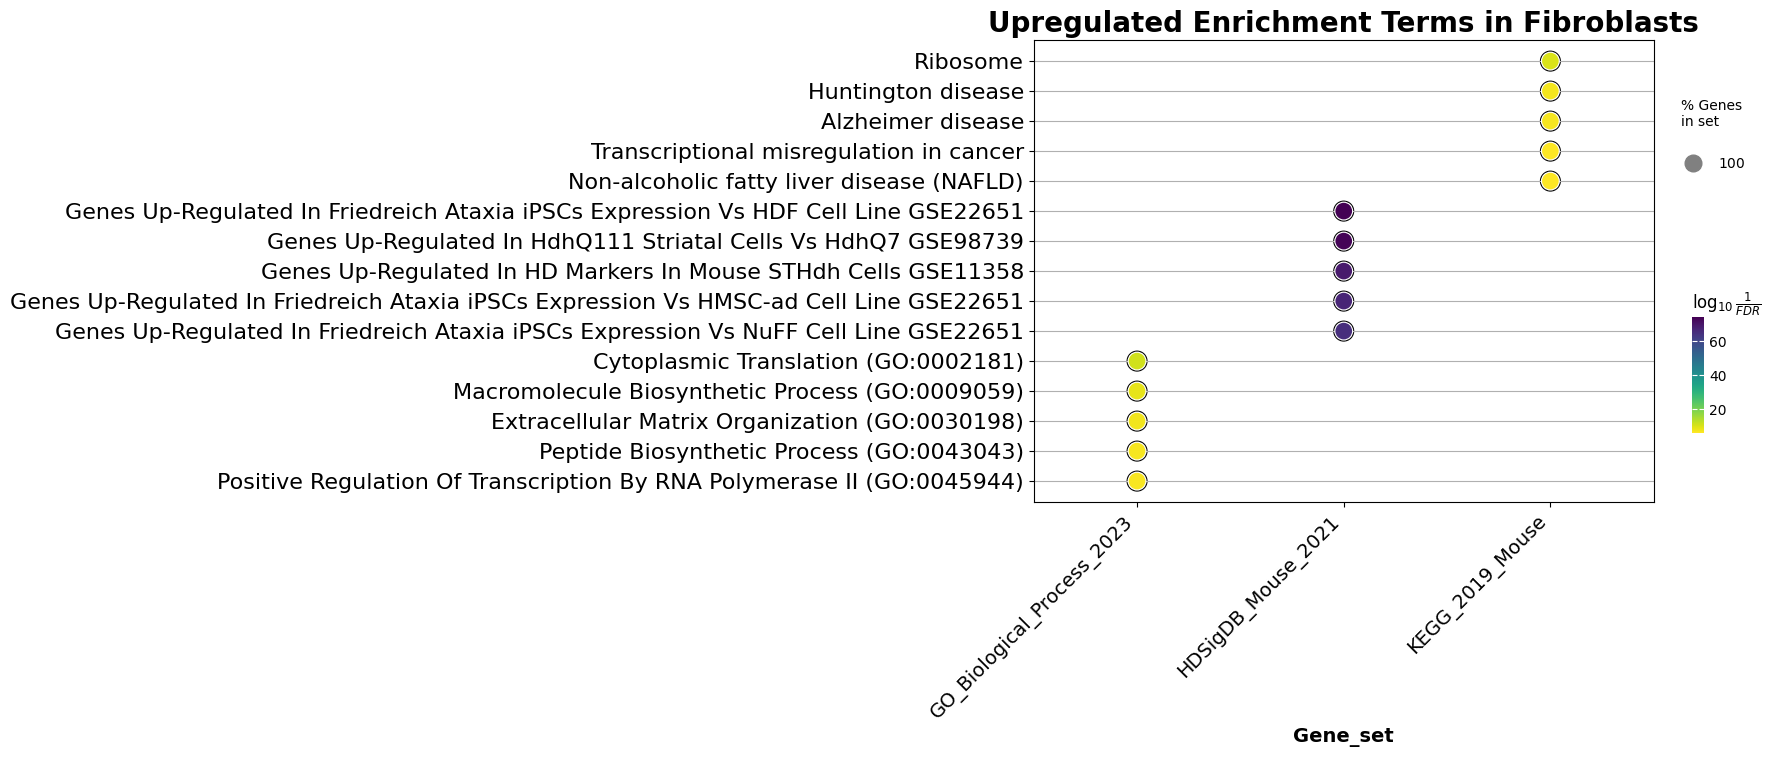

In [ ]:
# Upregulated Enrichment Terms Dot Plot
ax = gp.dotplot(enr_up_online_results,
              column="Adjusted P-value",
              x='Gene_set', # Set our X axis to be the gene set libraries we used
              size=2,
              top_term=5,
              figsize=(10,6),
              title = "Upregulated Enrichment Terms in Fibroblasts",
              xticklabels_rot=45,
              show_ring=True,
              marker='o',
             )

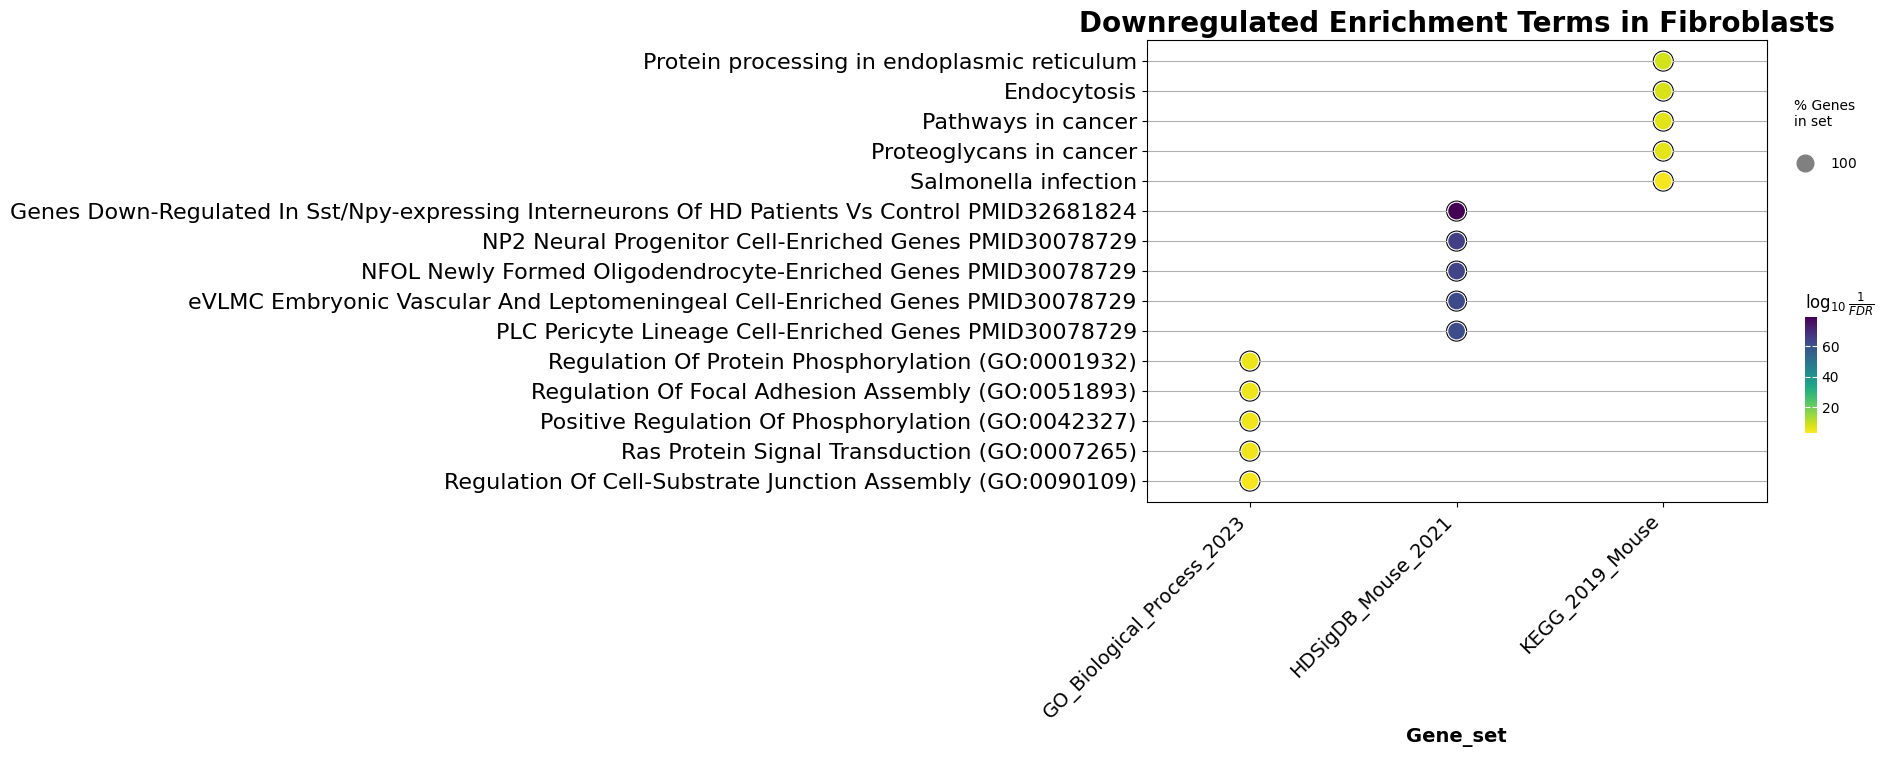

In [ ]:
# Downregulated Enrichment Terms Dot Plot
ax = gp.dotplot(enr_down_online_results,
              column="Adjusted P-value",
              x='Gene_set',
              size=2,
              top_term=5,
              figsize=(10,6),
              title = "Downregulated Enrichment Terms in Fibroblasts",
              xticklabels_rot=45,
              show_ring=True,
              marker='o',
             )

We can also plot scores or odds ratios on the x-axis compared to p-values in the gradient by changing the X-axis argument.

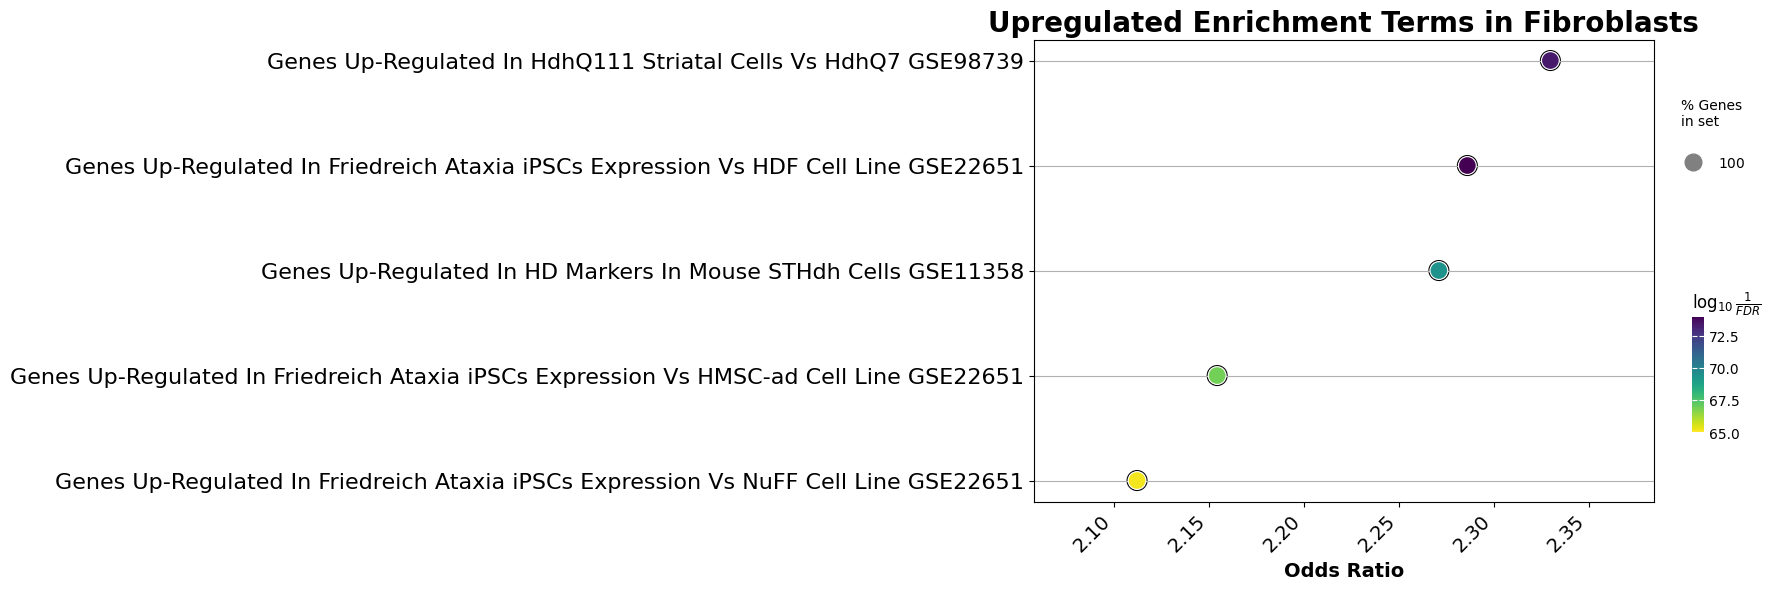

In [ ]:
# Upregulated Enrichment Terms Dot Plot
ax = gp.dotplot(enr_up_online_results,
              column="Adjusted P-value",
              x='Odds Ratio', # Set our X axis to be the odds ratio
              size=2,
              top_term=5,
              figsize=(10,6),
              title = "Upregulated Enrichment Terms in Fibroblasts",
              xticklabels_rot=45,
              show_ring=True,
              marker='o',
             )

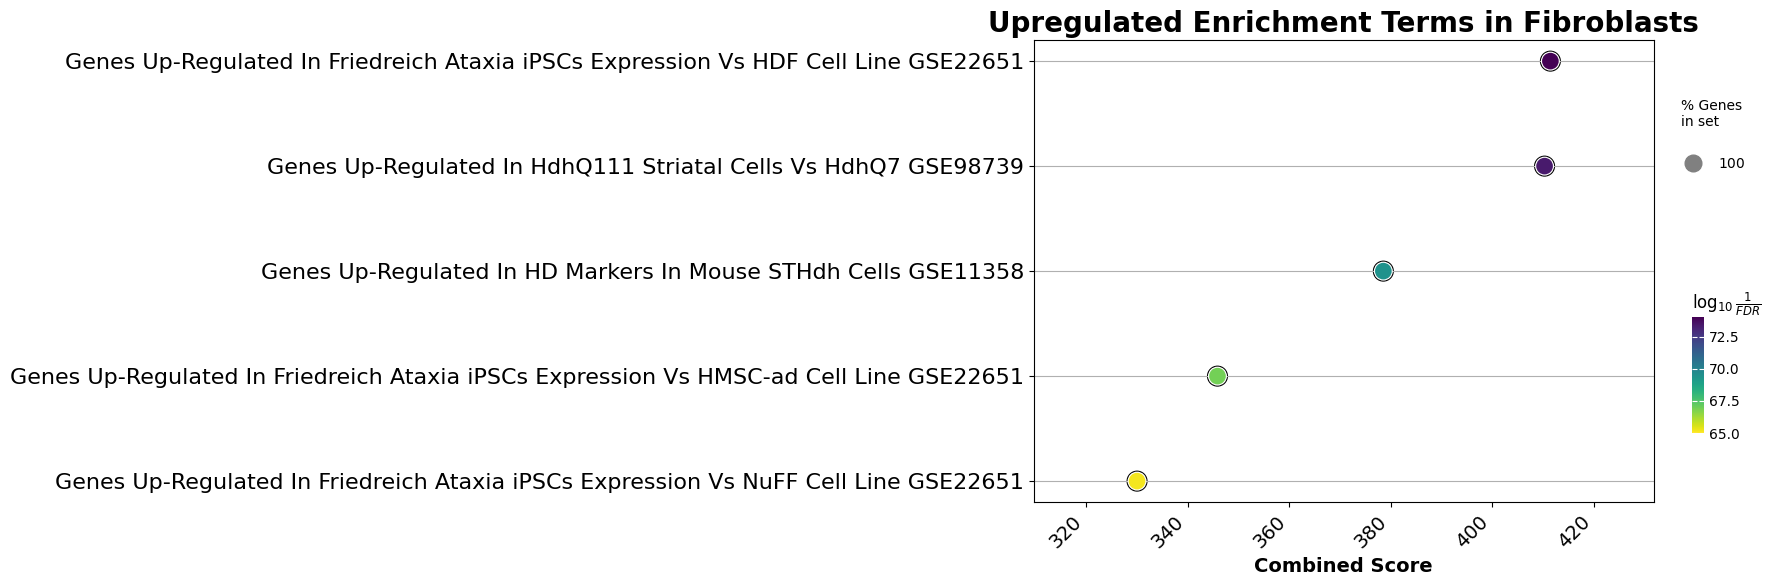

In [ ]:
# Upregulated Enrichment Terms Dot Plot
ax = gp.dotplot(enr_up_online_results,
              column="Adjusted P-value",
              x='Combined Scores', # Set our X axis to be the scores
              size=2,
              top_term=5,
              figsize=(10,6),
              title = "Upregulated Enrichment Terms in Fibroblasts",
              xticklabels_rot=45,
              show_ring=True,
              marker='o',
             )

We can also visually represent our data using a bar chart.

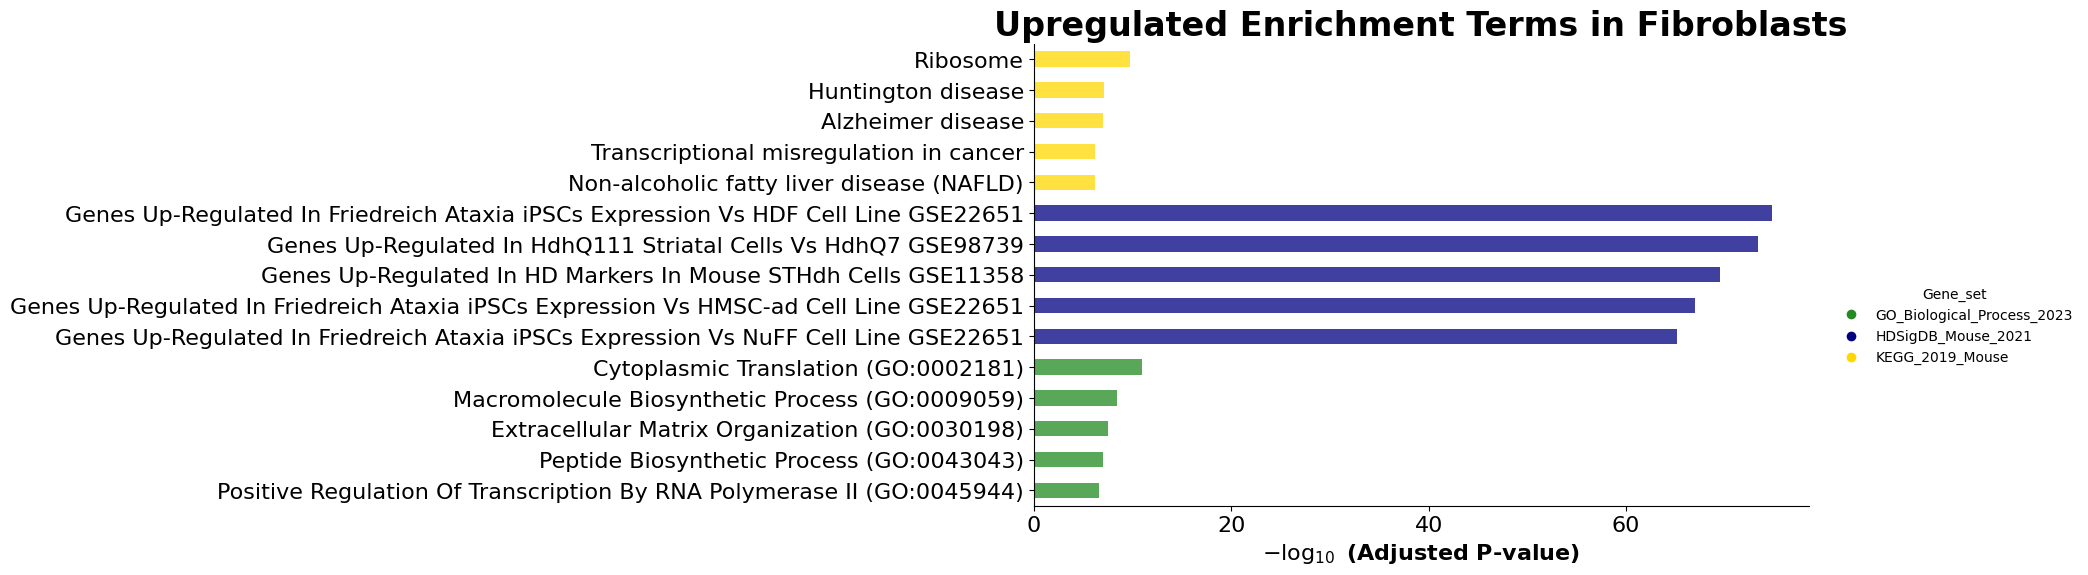

In [ ]:
# Upregulated Enrichment Terms Bar Chart
ax = gp.barplot(enr_up_online_results,
              column="Adjusted P-value",
              group='Gene_set', # Set our X axis to be the odds ratio
              size=2,
              top_term=5,
              figsize=(10,6),
              title = "Upregulated Enrichment Terms in Fibroblasts",
              #We need to define colors for each gene set library. Note: The dictionary to define colors must be
              #sorted alphabetically in asending order by gene set library name.
              color = {'GO_Biological_Process_2023':'forestgreen', 'HDSigDB_Mouse_2021':'navy', 'KEGG_2019_Mice': 'gold'}
             )

That's all for this tutorial! If you want to learn more about Enrichr or GSEApy, I recommend visiting the [Enrichr website](https://https://maayanlab.cloud/Enrichr/) or reading [GSEApy's documentation](https://https://gseapy.readthedocs.io/en/latest/introduction.html).